# Assignment #3

In [66]:
#Import the required Libraries
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

# Part A

### Data Download and Preparation

In [67]:
#Specify the ticker, 'IVV', for which price data will be downloaded (use the Ticker class, returning a ticker object)
IVV_Ticker = yf.Ticker('IVV')
#Use the history method of the ticker object, specifying the desired timeframe, which returns a dataframe of the downloaded data
IVV_Historical_Data = IVV_Ticker.history(start="2025-01-01", end="2025-01-31")
#With Date as the index column, select the first five columns of the downloaded dataset (Open, High, Low, Close, and Volume)
IVV_Historical_Data = IVV_Historical_Data.iloc[:,0:5]
#Take a look at the prepared dataframe
IVV_Historical_Data.head(5)      

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-02 00:00:00-05:00,592.169983,593.909973,583.330017,587.450012,9400400
2025-01-03 00:00:00-05:00,590.340027,595.429993,589.270020,594.609985,5867300
2025-01-06 00:00:00-05:00,599.150024,602.559998,596.429993,598.299988,4188000
2025-01-07 00:00:00-05:00,600.289978,600.570007,589.599976,591.570007,3810700
2025-01-08 00:00:00-05:00,591.489990,593.369995,587.979980,592.190002,5303600


### Plot, Label, and Format a Graph for IVV Price and Volume

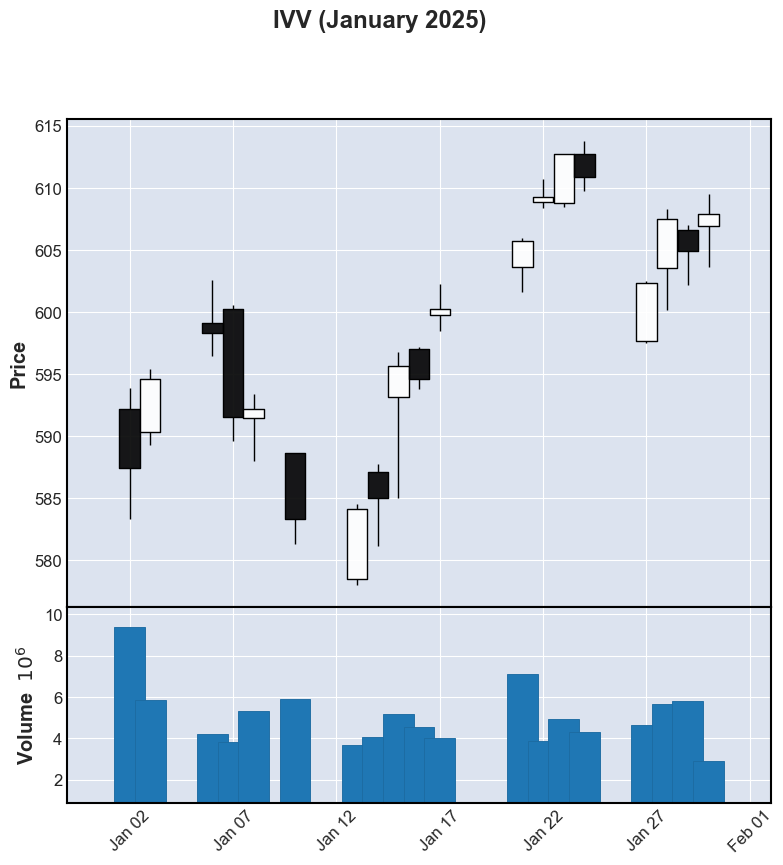

In [68]:
#Use the mplfinance library to create the desired graph for IVV Price and Volume (January 2025), adjusting various parameters described below to achieve the desired format
mpf.plot(IVV_Historical_Data, #Input the dataframe prepared above
            type='candle', #Set the plot type to candlestick
            volume=True, #Set to true in order to display volume
            show_nontrading=True, #Set to true so that non-trading periods are displayed
            figratio=(1,1), #Adjust the aspect ratio of the plot
            figscale=1.7, #Scale the figure size
            title='IVV (January 2025)' #Set the figure title to the desired value
        )

# Part B

### Data Import and Preparation

In [69]:
#Read the CSV file into a dataframe
Stock_Data = pd.read_csv("C:/Users/jdgie/Desktop/FINE3300 Assignments/Assignment #3/Dataset/StockData.csv")

In [70]:
#Since we are interested in AAPL, select only the Trading Day and AAPL columns, returning a new dataframe
Stock_Data_AAPL = Stock_Data.loc[:,['Trading Day','AAPL']]

#Take a look at the prepared dataframe
Stock_Data_AAPL.head(5)

,Trading Day,AAPL
0,1,72.362030
1,2,69.910980
2,3,71.020020
3,4,66.377579
4,5,66.338730


In [71]:
#Compute the required moving average, lower band, and upper band values (which comprise the Bollinger Bands)

#Since 20 prior days of data are required to compute the moving average, loop through each row starting at row label 20 (trading day 21)
for row in range(20, len(Stock_Data_AAPL)):
    #Compute the price average for the 20 days preceding the selected row/trading day, storing it in the selected row under a new column 'Moving Average'
    Stock_Data_AAPL.at[row,'Moving Average'] = Stock_Data_AAPL.loc[row-20:row-1,'AAPL'].mean()
    #Compute the standard deviation for the 20 days preceding the selected row/trading day (setting degrees of freedom = 0, to calculate population standard deviation), storing it in the selected row under a new column 'Standard Deviation'
    Stock_Data_AAPL.at[row,'Standard Deviation'] = Stock_Data_AAPL.loc[row-20:row-1,'AAPL'].std(ddof=0)

#Using the previously calculated Moving Average and Standard Deviation figures, use the provided formula to compute the upper and lower bands for each applicable trading day, storing them under new 'Upper Bound' and 'Lower Bound' columns, respectively
Stock_Data_AAPL['Upper Bound'] = Stock_Data_AAPL['Moving Average'] + (2 * Stock_Data_AAPL['Standard Deviation'])
Stock_Data_AAPL['Lower Bound'] = Stock_Data_AAPL['Moving Average'] - (2 * Stock_Data_AAPL['Standard Deviation'])

#Take a look at the prepared dataframe
Stock_Data_AAPL.head(21)

,Trading Day,AAPL,Moving Average,Standard Deviation,Upper Bound,Lower Bound
0,1,72.362030,NaN,NaN,NaN,NaN
1,2,69.910980,NaN,NaN,NaN,NaN
2,3,71.020020,NaN,NaN,NaN,NaN
3,4,66.377579,NaN,NaN,NaN,NaN
4,5,66.338730,NaN,NaN,NaN,NaN
5,6,72.514923,NaN,NaN,NaN,NaN
6,7,70.211899,NaN,NaN,NaN,NaN
7,8,73.468636,NaN,NaN,NaN,NaN
8,9,71.085541,NaN,NaN,NaN,NaN
9,10,70.141518,NaN,NaN,NaN,NaN


In [72]:
#Store the first 250 rows of the above dataframe in a new dataframe (first 250 trading days for AAPL), to be plotted below
Stock_Data_AAPL_250 = Stock_Data_AAPL.head(250)

### Plot, Label, and Format a Graph for AAPL with Bollinger Bands

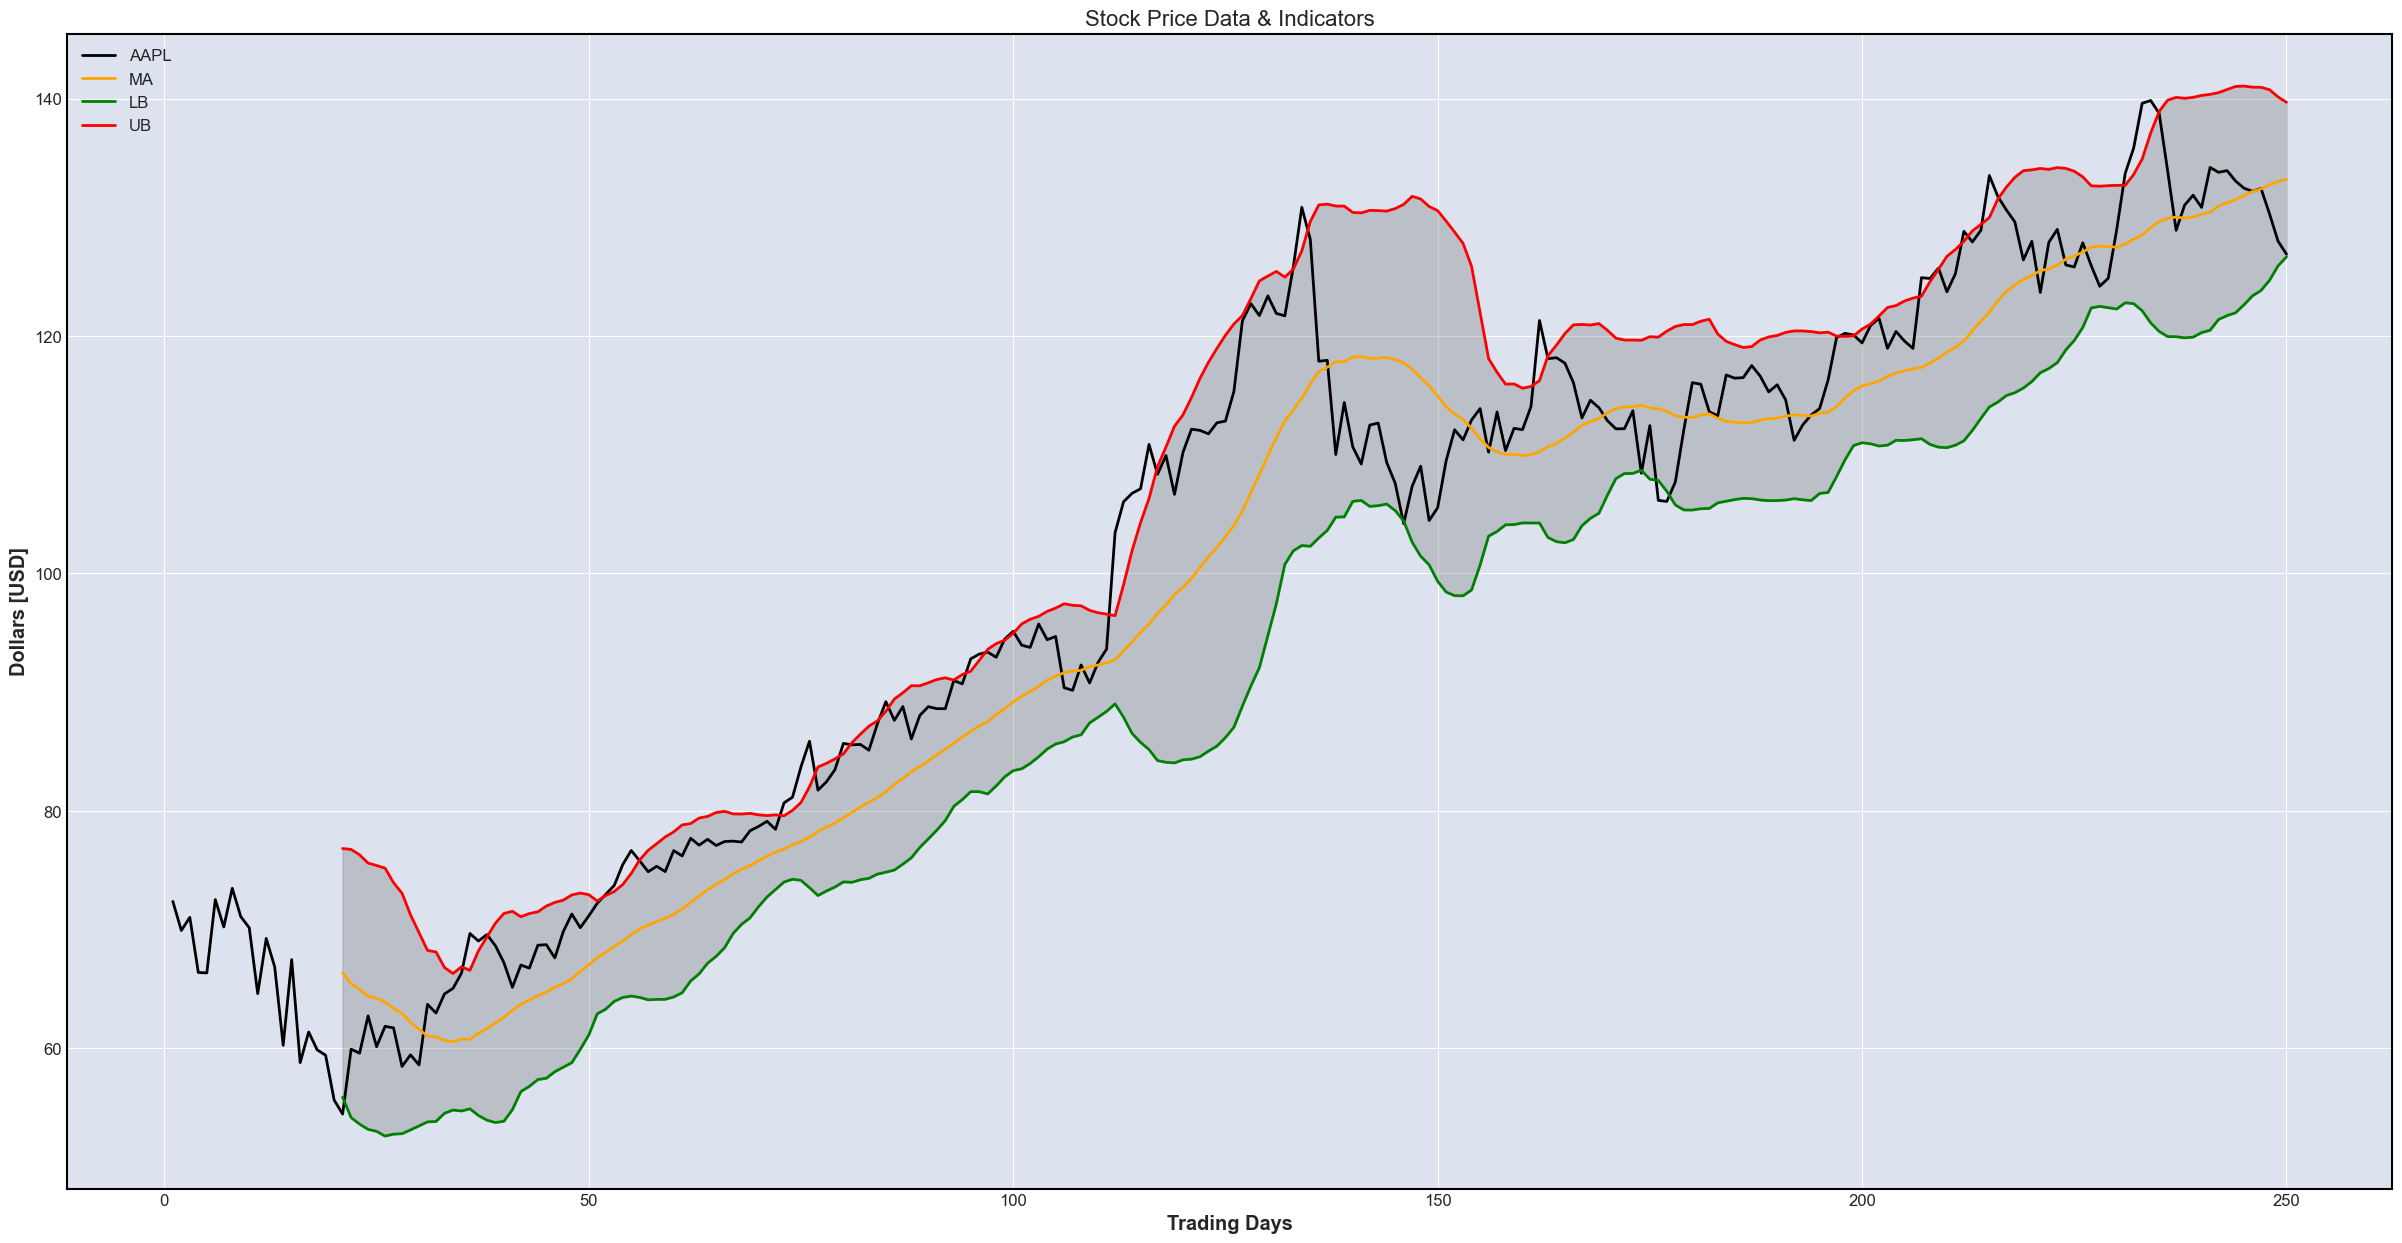

In [73]:
#Create a new graph (a figure and a single axes) with the matplotlib library, using the figsize parameter to adjust the figure width and height 
fig, ax = plt.subplots(figsize=(30,15))

#Use explicit code to plot the four required lines
#Plot Trading Day (x) against the price of AAPL (y), specifying the line color as black and the legend label as 'AAPL' 
ax.plot(Stock_Data_AAPL_250['Trading Day'], Stock_Data_AAPL_250['AAPL'], color='black', label='AAPL')
#Plot Trading Day (x) against Moving Average (y), specifying the line color as orange and the legend label as 'MA' 
ax.plot(Stock_Data_AAPL_250['Trading Day'], Stock_Data_AAPL_250['Moving Average'], color='orange', label='MA')
#Plot Trading Day (x) against Lower Bound (y), specifying the line color as green and the legend label as 'LB' 
ax.plot(Stock_Data_AAPL_250['Trading Day'], Stock_Data_AAPL_250['Lower Bound'], color='green', label='LB')
#Plot Trading Day (x) against Upper Bound (y), specifying the line color as red and the legend label as 'UB' 
ax.plot(Stock_Data_AAPL_250['Trading Day'], Stock_Data_AAPL_250['Upper Bound'], color='red', label='UB')

#Shade the area between the upper and lower bands, specifing x as Trading Day, y1 as Lower Bound, and y2 as Upper Bound, setting the fill color to grey, and alpha to 0.35 for partial transparency 
ax.fill_between(Stock_Data_AAPL_250['Trading Day'], Stock_Data_AAPL_250['Lower Bound'], Stock_Data_AAPL_250['Upper Bound'], color="grey", alpha=0.35)

#Set the title of the graph to the required value and adjust the size of the font
ax.set_title('Stock Price Data & Indicators', fontsize = 16)
#Set the label of the x-axis to the required value
ax.set_xlabel("Trading Days")
#Set the label of the y-axis to the required value
ax.set_ylabel("Dollars [USD]")

#Insert a legend into the graph
ax.legend()

#Display the graph
plt.show()